# How to use `gymnasium` and `pygmo`: examples

## Simple example of use of a `gymnasium` environment

In [2]:
import gymnasium as gym

# Create the CartPole environment
env = gym.make("CartPole-v1")

# Reset the environment to get the initial state
state, _ = env.reset()

# Run the environment for a few steps
for step in range(100):  # Number of steps
    # Take a random action
    action = env.action_space.sample()
    
    # Step the environment forward
    state, reward, terminated, truncated, _ = env.step(action)
    
    # Check if the episode has ended
    if terminated or truncated:
        print(f"Episode finished after {step + 1} steps")
        state, info = env.reset()  # Reset for a new episode if needed

env.close()

Episode finished after 18 steps
Episode finished after 32 steps
Episode finished after 46 steps
Episode finished after 58 steps
Episode finished after 70 steps
Episode finished after 84 steps
Episode finished after 95 steps


## Using `pygmo` for function minimization via genetic algorithms

The _Rastrigin_ function in 2 dimension

$$
f(x_1, x_2) = 20 + \sum_{i=1}^{2} \left[x_i^2 - 10\cos(2\pi x_i)\right]
$$

has multiple local minima and a global minimum at $(0,0)$.

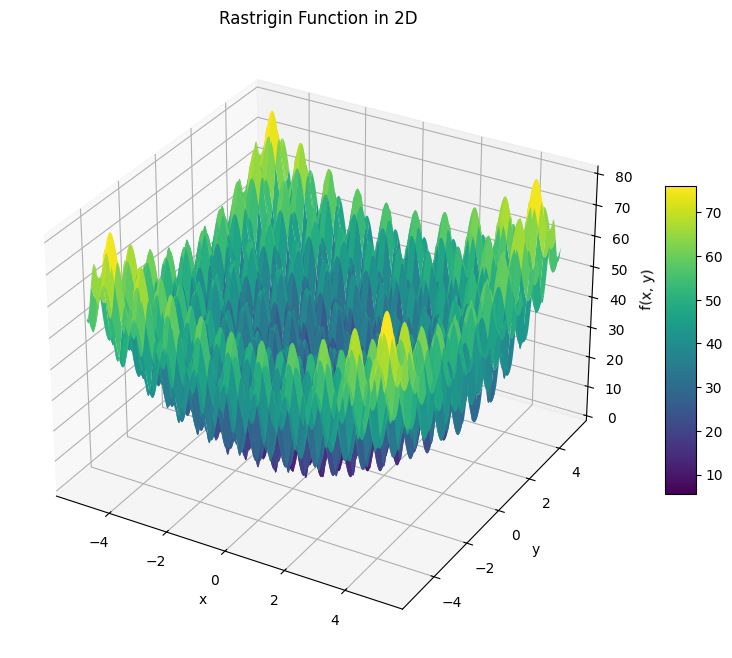

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rastrigin function for 2 dimensions
def rastrigin(x, y):
    A = 10
    return A * 2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

# Create a grid of x and y values
x = np.linspace(-5.12, 5.12, 500)
y = np.linspace(-5.12, 5.12, 500)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = rastrigin(X, Y)

# Plot the function
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and a title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Rastrigin Function in 2D')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

In [ ]:
import pygmo as pg
import numpy as np

# Define a custom optimization problem
class CustomOptimizationProblem:
    # Define the bounds for the variables
    def get_bounds(self):
        lower_bounds = [-5] * 2
        upper_bounds = [5] * 2
        return lower_bounds, upper_bounds

    # Define the fitness function to minimize
    def fitness(self, x):
        # Example: Rastrigin function
        A = 10
        return [A * 2 + sum((xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x)]

# Register the problem as a pygmo problem
problem = pg.problem(CustomOptimizationProblem())

# Create an instance of a genetic algorithm
algo = pg.algorithm(pg.de(gen=100))

# Create a population of candidate solutions
pop = pg.population(prob=problem, size=50)

# Evolve the population
print("Starting optimization...")
pop = algo.evolve(pop)

# Retrieve the best solution
best_solution = pop.champion_x
best_fitness = pop.champion_f

# Display the result
print("Best solution found:", best_solution)
print("Fitness of the best solution:", best_fitness)

# Print the global minimum of the Rastrigin function
global_minimum = [0, 0]  # The global minimum is at x = [0, 0]
global_minimum_fitness = 0  # Fitness at the global minimum
print("Global minimum is at:", global_minimum)
print("Fitness at global minimum:", global_minimum_fitness)

Starting optimization...
Best solution found: [2.29636142e-06 9.59373503e-07]
Fitness of the best solution: [1.22877708e-09]
Global minimum is at: [0, 0]
Fitness at global minimum: 0
